In [40]:

# model.save('/kaggle/working/best_model')


In [41]:
# import shutil
# import os

# model_directory = '/kaggle/working/best_model'
# zip_file_name = 'keras_model_zip'

# # Create the ZIP file
# shutil.make_archive(zip_file_name, 'zip', model_directory)

# # Optional: Print the path of the created ZIP file
# print(f"Created ZIP file: {zip_file_name}.zip")


Created ZIP file: keras_model_zip.zip


In [42]:
from tensorflow.keras.models import load_model

loaded_model = load_model('keras_model_zip')


In [45]:
from PIL import Image
import numpy as np

def load_and_preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.expand_dims(image, axis=0)
    return image

image_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (100).png'  
target_size = (256, 256)  

new_image = load_and_preprocess_image(image_path, target_size)

predicted_mask = loaded_model.predict(new_image)

predicted_mask = np.squeeze(predicted_mask)


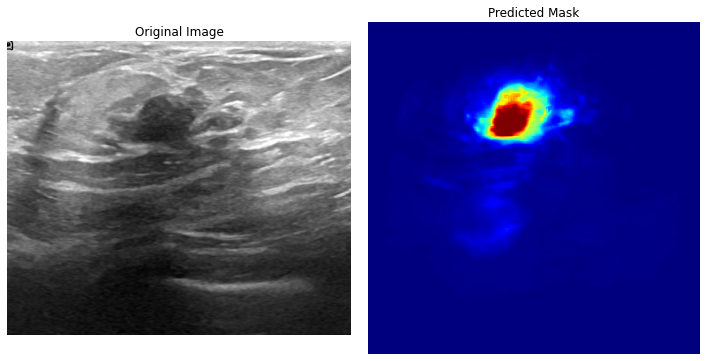

In [46]:
import matplotlib.pyplot as plt

def display_image_and_mask(original_image_path, predicted_mask):
    original_image = Image.open(original_image_path)
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask, cmap='jet') 
    plt.title('Predicted Mask')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

display_image_and_mask(image_path, predicted_mask)


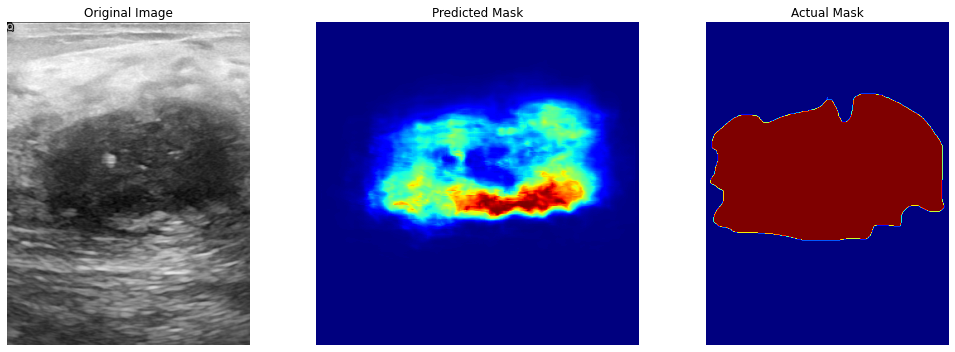

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)
    return image

# Function to display the original image, predicted mask, and actual mask
def display_images(original_image_path, predicted_mask, actual_mask_path):
    # Load the original image
    original_image = Image.open(original_image_path)
    
    # Load the actual mask
    actual_mask = Image.open(actual_mask_path)
    actual_mask = np.array(actual_mask) / 255.0  # Normalize if necessary

    # Create a figure to display the images
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Display the predicted mask
    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(predicted_mask), cmap='jet')  # Use a colormap for better visibility
    plt.title('Predicted Mask')
    plt.axis('off')

    # Display the actual mask
    plt.subplot(1, 3, 3)
    plt.imshow(actual_mask, cmap='jet')  # Use a colormap for better visibility
    plt.title('Actual Mask')
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Define paths
image_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (1).png'  # Original image path
actual_mask_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (1)_mask.png'  # Path to the actual mask

# Load and preprocess the image
new_image = load_and_preprocess_image(image_path, target_size=(256, 256))

# Use the model to predict the mask
predicted_mask = loaded_model.predict(new_image)

# Display the images
display_images(image_path, predicted_mask, actual_mask_path)
